### Prediction of demands of shared bikes

## import libraries 

In [93]:
import pandas as pd
import numpy as np
from numpy import round 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Dataset

In [94]:
Bike_Data=pd.read_csv('day.csv')

## Type of Bike_Data
### Standard information about Data

In [95]:
Bike_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Information of data we have
- Total rows we have 730 and total 
  columns 15
- Data Type present are int and object

In [96]:
Bike_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Stastical Data

### First objective for me is to
 **Transform Data to integer format**  

In [97]:
Bike_Data['hum']=[int(round(hum))for hum in Bike_Data['hum']]
Bike_Data['windspeed']=[int(round(speed))for speed in Bike_Data['windspeed']]
Bike_Data['temp']=[int(round(temp)) for temp in Bike_Data['temp']]
Bike_Data['atemp']=[int(round(atemp))for atemp in Bike_Data ['atemp']]

In [98]:
Bike_Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14,18,81,11,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,15,18,70,17,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8,9,44,17,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8,11,59,11,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10,11,65,23,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10,13,59,10,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10,12,75,8,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10,12,48,24,364,1432,1796


#### Group by month

In [99]:

Bike_Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14,18,81,11,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,15,18,70,17,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8,9,44,17,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8,11,59,11,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10,11,65,23,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10,13,59,10,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10,12,75,8,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10,12,48,24,364,1432,1796


### split dte_day column to
- year
- month_name
- day_name

In [100]:
Invalid_Values=Bike_Data.isna().sum()
print(Invalid_Values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [101]:
Days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
Months={0:'misc',1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Seasons={1:'spring', 2:'summer', 3:'fall', 4:'winter'}

Year={0:2018,1:2019}

In [102]:
Bike_Data['weekday']=[Days[day] for day in Bike_Data['weekday']]
Bike_Data['mnth']=[Months[mnth]for mnth in Bike_Data['mnth']]
Bike_Data['yr']=[Year[yr] for yr in Bike_Data['yr']]
Bike_Data['season']=[Seasons[ses] for ses in Bike_Data['season']]
Bike_Data=Bike_Data.drop(columns=['dteday','instant'])

In [103]:
Bike_Data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sunday,0,2,14,18,81,11,331,654,985
1,spring,2018,Jan,0,Monday,0,2,15,18,70,17,131,670,801
2,spring,2018,Jan,0,Tuesday,1,1,8,9,44,17,120,1229,1349
3,spring,2018,Jan,0,Wednesday,1,1,8,11,59,11,108,1454,1562
4,spring,2018,Jan,0,Thursday,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,2,10,11,65,23,247,1867,2114
726,spring,2019,Dec,0,Saturday,1,2,10,13,59,10,644,2451,3095
727,spring,2019,Dec,0,Sunday,0,2,10,12,75,8,159,1182,1341
728,spring,2019,Dec,0,Monday,0,1,10,12,48,24,364,1432,1796


In [104]:
Bike_Data.groupby(['mnth'])

In [105]:
Bike_Data.groupby(['weekday'])
Bike_Data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sunday,0,2,14,18,81,11,331,654,985
1,spring,2018,Jan,0,Monday,0,2,15,18,70,17,131,670,801
2,spring,2018,Jan,0,Tuesday,1,1,8,9,44,17,120,1229,1349
3,spring,2018,Jan,0,Wednesday,1,1,8,11,59,11,108,1454,1562
4,spring,2018,Jan,0,Thursday,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,2,10,11,65,23,247,1867,2114
726,spring,2019,Dec,0,Saturday,1,2,10,13,59,10,644,2451,3095
727,spring,2019,Dec,0,Sunday,0,2,10,12,75,8,159,1182,1341
728,spring,2019,Dec,0,Monday,0,1,10,12,48,24,364,1432,1796


### Pair plot

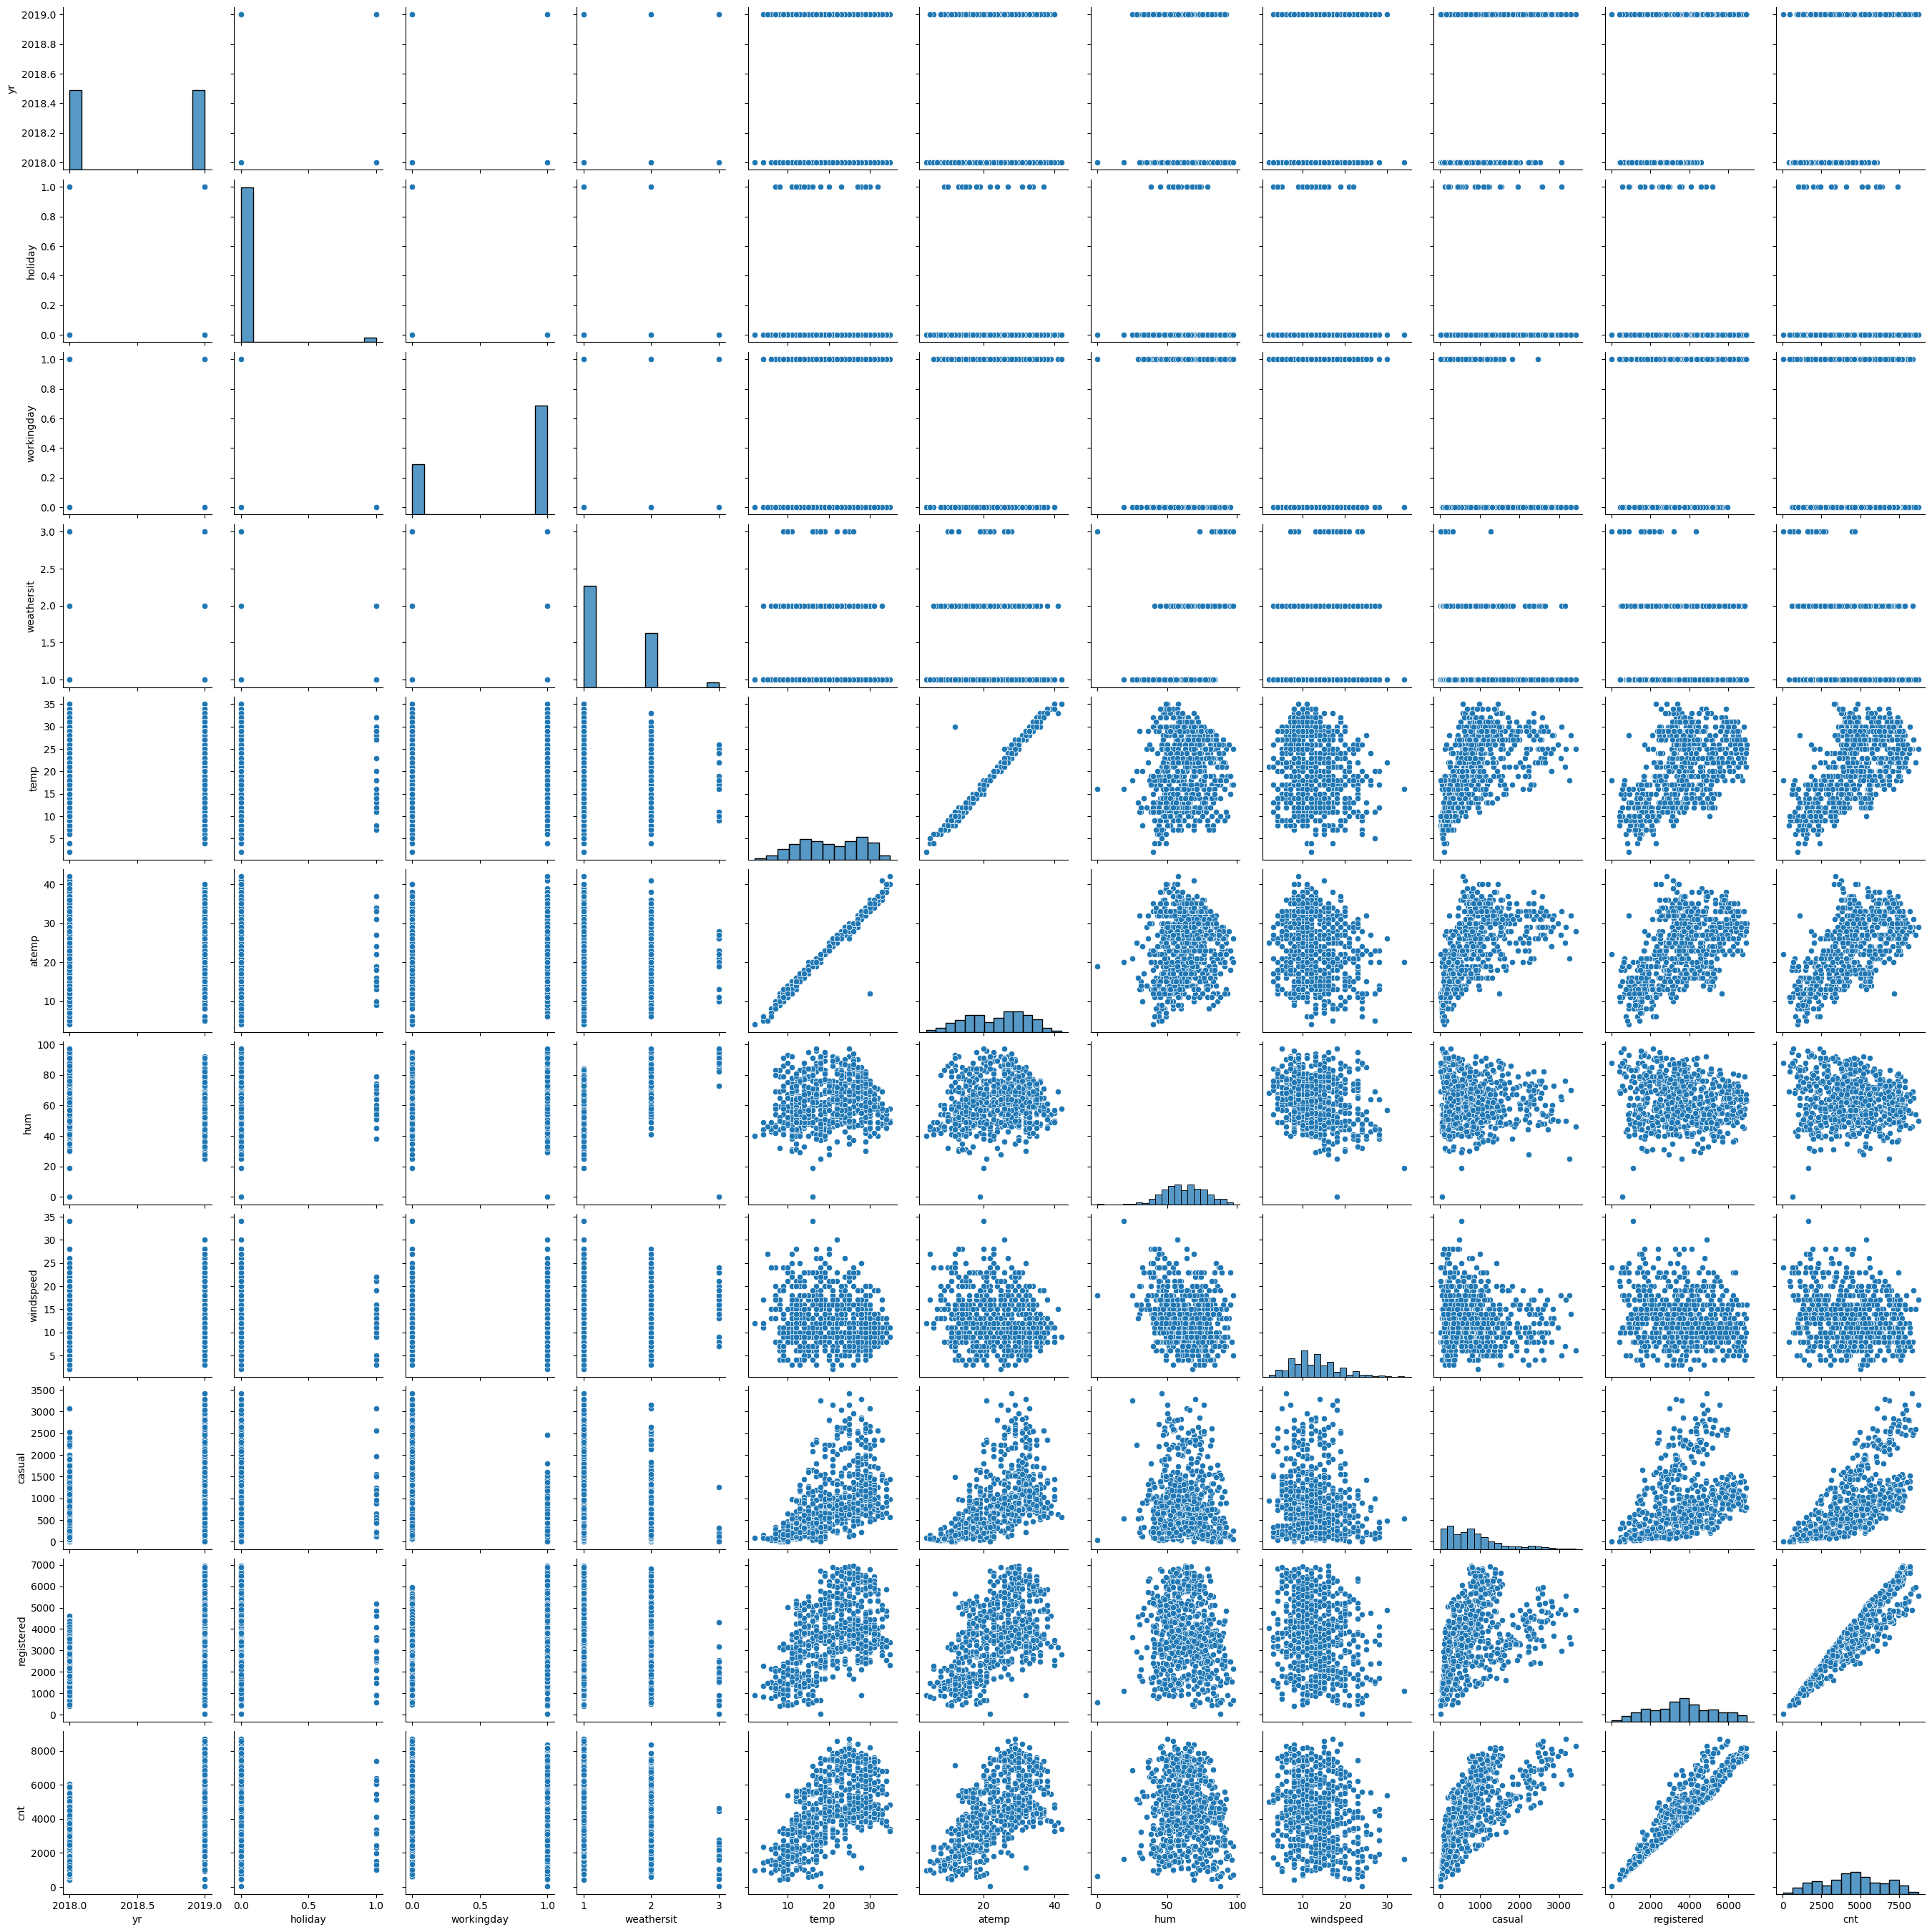

In [106]:
sns.pairplot(Bike_Data)
plt.show()

### Factors Not contributing

1. **working day 0 or 1 having same effect on cnt**
2. **Also atemp is the temperature feeling by individual ,i don't think its a valid factor**
 

**Removing workingday,atemp**

In [107]:
Bike_Data.drop(columns=['workingday','atemp'])
Bike_Data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sunday,0,2,14,18,81,11,331,654,985
1,spring,2018,Jan,0,Monday,0,2,15,18,70,17,131,670,801
2,spring,2018,Jan,0,Tuesday,1,1,8,9,44,17,120,1229,1349
3,spring,2018,Jan,0,Wednesday,1,1,8,11,59,11,108,1454,1562
4,spring,2018,Jan,0,Thursday,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,2,10,11,65,23,247,1867,2114
726,spring,2019,Dec,0,Saturday,1,2,10,13,59,10,644,2451,3095
727,spring,2019,Dec,0,Sunday,0,2,10,12,75,8,159,1182,1341
728,spring,2019,Dec,0,Monday,0,1,10,12,48,24,364,1432,1796


In [108]:
type(Bike_Data['weathersit'])
Bike_Data['weathersit']

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

**As per Data Dictionary information about weathersit is:**
weathersit : 
		 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - But i can't find clear criteria which 1 is Clear or partly cloudy,Fewclouds.
  - But its affecting cnt so not deleting it anf keeping it in its original form

In [109]:
Bike_Data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sunday,0,2,14,18,81,11,331,654,985
1,spring,2018,Jan,0,Monday,0,2,15,18,70,17,131,670,801
2,spring,2018,Jan,0,Tuesday,1,1,8,9,44,17,120,1229,1349
3,spring,2018,Jan,0,Wednesday,1,1,8,11,59,11,108,1454,1562
4,spring,2018,Jan,0,Thursday,1,1,9,11,44,13,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Friday,1,2,10,11,65,23,247,1867,2114
726,spring,2019,Dec,0,Saturday,1,2,10,13,59,10,644,2451,3095
727,spring,2019,Dec,0,Sunday,0,2,10,12,75,8,159,1182,1341
728,spring,2019,Dec,0,Monday,0,1,10,12,48,24,364,1432,1796


### Relation between (season and cnt)/(yr,cnt)/(mnth,cnt)

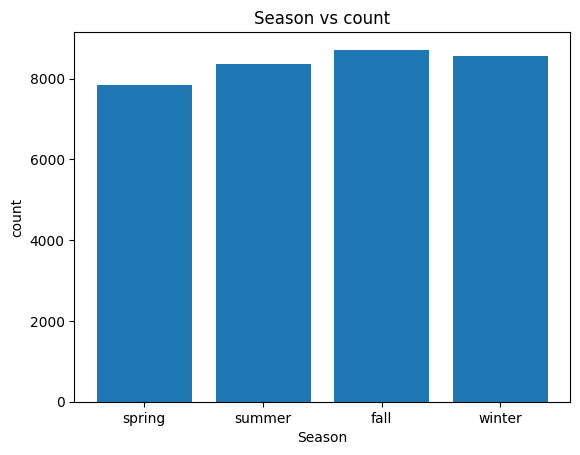

In [110]:
x=Bike_Data['season']
y=Bike_Data['cnt']
plt.title('Season vs count')
plt.xlabel('Season')
plt.ylabel('count')
plt.bar(x,y)
plt.show()

**Conclusion**
"fall" is the season which has high demand 
- We should focus on increasing demands in other seasons without affecting demand in "Fall" 
- One thing we should keep a check on availability of bikes during "Fall" season
- And for other seasons we can provide customers with attractive offers like discounts,goodies,vouchers
  as per our budget


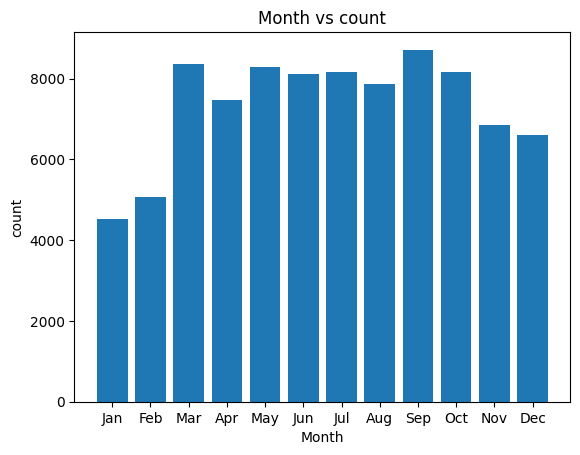

In [111]:
x=Bike_Data['mnth']
y=Bike_Data['cnt']
plt.title('Month vs count')
plt.xlabel('Month')
plt.ylabel('count')
plt.bar(x,y)
plt.show()